In [1]:
# 4.5 异常检测分析
# 导入库
from sklearn.svm import OneClassSVM  # 导入OneClassSVM
import numpy as np  # 导入numpy库
import matplotlib.pyplot as plt  # 导入Matplotlib
from mpl_toolkits.mplot3d import Axes3D  # 导入3D样式库

### 高维数据

In [2]:
# 数据准备
raw_data = np.loadtxt('outlier.txt', delimiter=' ')  # 读取数据
train_set = raw_data[:900, :]  # 训练集
test_set = raw_data[:100, :]  # 测试集

In [3]:
# 异常数据检测
model_onecalsssvm = OneClassSVM(nu=0.1, kernel="rbf", random_state=0)  # 创建异常检测算法模型对象
model_onecalsssvm.fit(train_set)  # 训练模型
pre_test_outliers = model_onecalsssvm.predict(test_set)  # 异常检测

/usr/local/lib/python2.7/site-packages/sklearn/svm/classes.py:1175: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
# 异常结果统计
toal_test_data = np.hstack((test_set, pre_test_outliers.reshape(test_set.shape[0], 1)))  # 将测试集和检测结果合并
normal_test_data = toal_test_data[toal_test_data[:, -1] == 1]  # 获得异常检测结果中正常数据集
outlier_test_data = toal_test_data[toal_test_data[:, -1] == -1]  # 获得异常检测结果中异常数据
n_test_outliers = outlier_test_data.shape[1]  # 获得异常的结果数量
total_count_test = toal_test_data.shape[0]  # 获得测试集样本量
print ('outliers: {0}/{1}'.format(n_test_outliers, total_count_test))  # 输出异常的结果数量
print ('{:*^80}'.format(' all result data (limit 5) '))  # 打印标题
print (toal_test_data[:5])  # 打印输出前5条合并后的数据集

outliers: 6/100
************************** all result data (limit 5) ***************************
[[ 0.03685295  0.0343899   0.09197858 -0.01026255 -0.00814121 -1.        ]
 [-0.0011522   0.02174971 -0.02040125  0.00986554 -0.03447136  1.        ]
 [-0.01258645  0.04736393  0.01110832 -0.01156876 -0.02334062  1.        ]
 [-0.02837847  0.04398011  0.00126378  0.02313849  0.00542565  1.        ]
 [ 0.02222529  0.00715191 -0.03713534 -0.02938668 -0.09915368 -1.        ]]


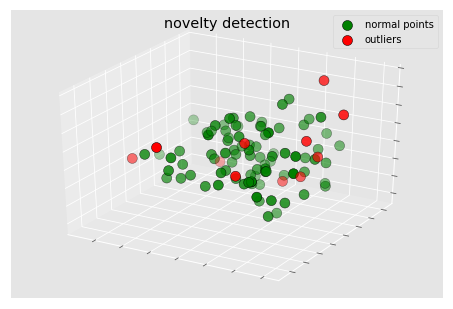

In [52]:
# 异常检测结果展示
plt.style.use('seaborn-pastel')  # 使用ggplot样式库
fig = plt.figure()  # 创建画布对象
ax = Axes3D(fig)  # 将画布转换为3D类型
s1 = ax.scatter(normal_test_data[:, 0], normal_test_data[:, 1], normal_test_data[:, 2], s=100, edgecolors='k', c='g',
                marker='o')  # 画出正常样本点
s2 = ax.scatter(outlier_test_data[:, 0], outlier_test_data[:, 1], outlier_test_data[:, 2], s=100, edgecolors='k', c='r',
                marker='o')  # 画出异常样本点
ax.w_xaxis.set_ticklabels([])  # 隐藏x轴标签，只保留刻度线
ax.w_yaxis.set_ticklabels([])  # 隐藏y轴标签，只保留刻度线
ax.w_zaxis.set_ticklabels([])  # 隐藏z轴标签，只保留刻度线
ax.legend([s1, s2], ['normal points', 'outliers'], loc=0)  # 设置两类样本点的图例
plt.title('novelty detection')  # 设置图像标题
plt.show()  # 展示图像

### 平面数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

In [2]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
print X_train.shape
print X_test.shape
print X_outliers.shape

(200, 2)
(40, 2)
(20, 2)


In [24]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

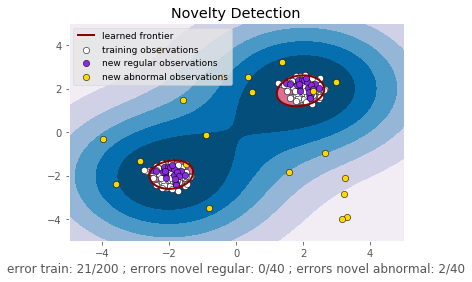

In [46]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40 # point size
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=9))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

https://blog.csdn.net/qq_32951553/article/details/80662525

数据生成

#### 1.二维数据

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

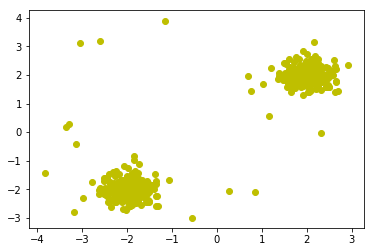

In [3]:
np.random.seed(42)
X = 0.3 * np.random.randn(240, 2)
X_outliters = np.random.uniform(low=-4, high=4, size=(20,2))
X = np.r_[X+2, X-2, X_outliters]
data = pd.DataFrame(X, columns=['X','Y'])
plt.scatter(data['X'], data['Y'], color='y')

##### 基于统计的异常检测方法 -- 正态分布

<img src='normal_distribution.png'>

<img src='mad.png'>

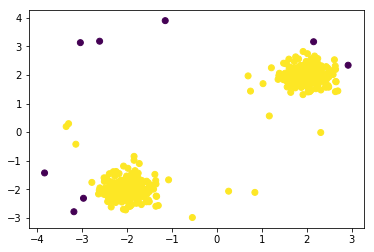

In [4]:
# 1.[绝对中位差]标准差上下三倍绝对中位差之间属于正常点
b = 0.45 # 控制范围
data['xn'] = np.sqrt(data['X']**2 + data['Y']**2)
data_std = np.std(data['xn'])
mad = b * np.median(np.abs(data['xn']-data_std))
lower = data_std - 3*mad
higher = data_std + 3*mad
def flag(x):
    return 1 if lower <= x <= higher else 0
c = data['xn'].apply(flag)
plt.scatter(data['X'], data["Y"], c=c)

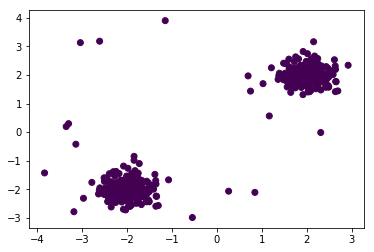

In [5]:
# 2.[平均值]平均值上下三倍标准差之间属于正常点
b = 0.001
data['xn'] = np.sqrt(data['X']**2 + data['Y']**2)
data_std = np.std(data['xn'])
data_mean = np.mean(data['xn'])
lower = data_mean - 3*b*data_std
higher = data_mean - 3*b*data_std
def flag(x):
    return 1 if lower<= x <= higher else 0
c = data['xn'].apply(flag)
plt.scatter(data['X'], data['Y'], c=c)

#### 基于密度的异常检测方法 LOF

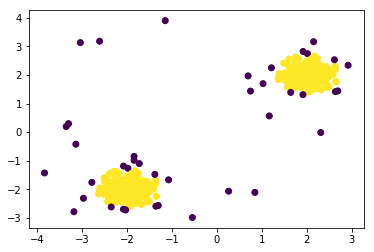

In [7]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=60, contamination=0.08)
y_pred = clf.fit_predict(data)
plt.scatter(data['X'], data['Y'], c=y_pred)

#### 基于划分的方法 孤立森林 IsolationForest

/usr/local/lib/python2.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python2.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


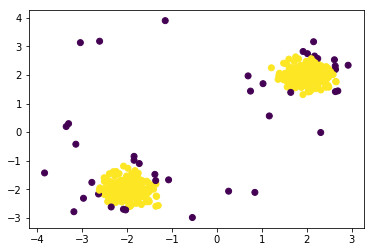

In [11]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(max_samples=140, random_state=42, contamination=0.08)
model.fit(data)
y_pred = model.predict(data)
plt.scatter(data['X'],data['Y'],c=y_pred)

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=140, random_state=42, contamination=0.08)

clf.fit(data)

y_pred = clf.predict(data)

plt.scatter(data["X"], data["Y"],  c=y_pred)

In [66]:
from sklearn.datasets import make_classification

In [67]:
data = make_classification(n_samples=500, 
                    n_features=20, 
                    n_informative=2, 
                    n_redundant=2, 
                    n_repeated=0, 
                    n_classes=2, 
                    n_clusters_per_class=2, 
                    weights=None, 
                    flip_y=0.01, 
                    class_sep=1.0, 
                    hypercube=True, 
                    shift=0.0, 
                    scale=1.0, 
                    shuffle=True, 
                    random_state=None)

In [68]:
data_set, lables = data

In [69]:
data_train = data_set[:300,:]
data_test = data_set[:-200,:]

In [70]:
from sklearn.svm import OneClassSVM

In [71]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.08)
pred = clf.fit_predict(data_train)
print pred

[ 1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1]


In [31]:
model = OneClassSVM(nu=0.1,
                   kernel='rbf',
                   random_state=0)